In [2]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

In [3]:
root = "ROC_csvs/"
labels = np.genfromtxt(root+'true_output.csv', delimiter=',')
baseline_yscore = np.genfromtxt(root+'baseline_output.csv', delimiter=',')
dino_yscore1 = np.genfromtxt(root+'dino1_output.csv', delimiter=',')
dino_yscore2 = np.genfromtxt(root+'dino2_output.csv', delimiter=',')
dino_yscore3 = np.genfromtxt(root+'dino3_output.csv', delimiter=',')

In [4]:
nn_fpr_dino1, nn_tpr_dino1, nn_thresholds_dino1 = roc_curve(labels, dino_yscore1)
nn_fpr_dino2, nn_tpr_dino2, nn_thresholds_dino2 = roc_curve(labels, dino_yscore2)
nn_fpr_dino3, nn_tpr_dino3, nn_thresholds_dino3 = roc_curve(labels, dino_yscore3)
print("Calculated ROC dino")

nn_fpr_baseline, nn_tpr_baseline, nn_thresholds_baseline = roc_curve(labels, baseline_yscore)
print("Calculated ROC baseline")

AUC_dino1 = roc_auc_score(labels,dino_yscore1)
AUC_dino2 = roc_auc_score(labels,dino_yscore2)
AUC_dino3 = roc_auc_score(labels,dino_yscore3)
print("Calculated AUC dino")

AUC_baseline = roc_auc_score(labels,baseline_yscore)
print("Calculated AUC baseline")


Calculated ROC dino
Calculated ROC baseline
Calculated AUC dino
Calculated AUC baseline


In [10]:
AUC_dino1

0.9377576027181886

In [11]:
AUC_baseline

0.9252210076478928

In [15]:
0.9377576027 - 0.9252210076

0.012536595099999936

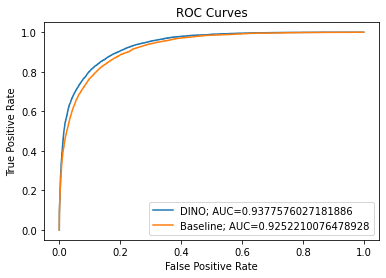

In [5]:
plt.plot(nn_fpr_dino1,nn_tpr_dino1,label="DINO; AUC={}".format(AUC_dino1))
plt.plot(nn_fpr_baseline,nn_tpr_baseline,label = "Baseline; AUC={}".format(AUC_baseline))
plt.title("ROC Curves")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
plt.show()

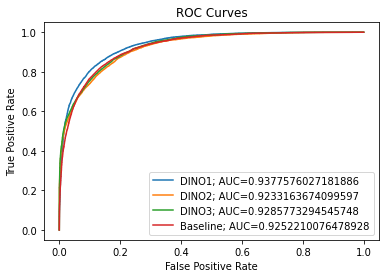

In [6]:
plt.plot(nn_fpr_dino1,nn_tpr_dino1,label="DINO1; AUC={}".format(AUC_dino1))
plt.plot(nn_fpr_dino2,nn_tpr_dino2,label="DINO2; AUC={}".format(AUC_dino2))
plt.plot(nn_fpr_dino3,nn_tpr_dino3,label="DINO3; AUC={}".format(AUC_dino3))
plt.plot(nn_fpr_baseline,nn_tpr_baseline,label = "Baseline; AUC={}".format(AUC_baseline))

plt.title("ROC Curves")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
plt.show()

In [7]:
def permutation_test_between_clfs(y_test, pred_proba_1, pred_proba_2, nsamples=1000):
    '''
    https://stackoverflow.com/questions/52373318/how-to-compare-roc-auc-scores-of-different-binary-classifiers-and-assess-statist#:~:text=better%20than%20chance.-,Permutation%20test%20for%20differences%20between%20classifiers,-This%20is%20much
    '''
    auc_differences = []
    auc1 = roc_auc_score(y_test.ravel(), pred_proba_1.ravel())
    auc2 = roc_auc_score(y_test.ravel(), pred_proba_2.ravel())
    observed_difference = auc1 - auc2
    for _ in range(nsamples):
        mask = np.random.randint(2, size=len(pred_proba_1.ravel()))
        p1 = np.where(mask, pred_proba_1.ravel(), pred_proba_2.ravel())
        p2 = np.where(mask, pred_proba_2.ravel(), pred_proba_1.ravel())
        auc1 = roc_auc_score(y_test.ravel(), p1)
        auc2 = roc_auc_score(y_test.ravel(), p2)
        auc_differences.append(auc1 - auc2)
    return observed_difference, np.mean(auc_differences >= observed_difference)

In [8]:
permutation_test_between_clfs(labels, dino_yscore1, baseline_yscore)

(0.012536595070295808, 0.0)

In [9]:
permutation_test_between_clfs(labels, dino_yscore2, baseline_yscore)

KeyboardInterrupt: 

In [ ]:
permutation_test_between_clfs(labels, dino_yscore3, baseline_yscore)

(0.0033563218066819944, 0.02)

In [ ]:
# nn_fpr_dino1, nn_tpr_dino1, nn_thresholds_dino1 = roc_curve(labels, dino_yscore1)
# nn_fpr_dino2, nn_tpr_dino2, nn_thresholds_dino2 = roc_curve(labels, dino_yscore2)
# nn_fpr_dino3, nn_tpr_dino3, nn_thresholds_dino3 = roc_curve(labels, dino_yscore3)


# AUC_dino1 = roc_auc_score(labels,dino_yscore1)
# AUC_dino2 = roc_auc_score(labels,dino_yscore2)
# AUC_dino3 = roc_auc_score(labels,dino_yscore3)
df1 = pd.DataFrame()
df1['tpr'] = nn_tpr_dino1
df1['fpr'] = nn_fpr_dino1

df2 = pd.DataFrame()
df2['tpr'] = nn_tpr_dino2
df2['fpr'] = nn_fpr_dino2

df3 = pd.DataFrame()
df3['tpr'] = nn_tpr_dino3
df3['fpr'] = nn_fpr_dino3

df = pd.concat([df1,df2,df3])


<AxesSubplot:xlabel='fpr', ylabel='tpr'>

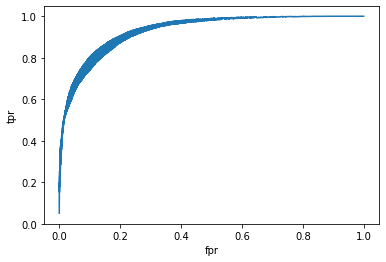

In [ ]:
sns.lineplot(data=df, x="fpr", y="tpr")